## Info About Dataset
**The key features are four urinary biomarkers: creatinine, LYVE1, REG1B, and TFF1.**

"Creatinine" is a protein that is often used as an indicator of kidney function.

"YVLE1" is lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis

"REG1B" is a protein that may be associated with pancreas regeneration

"TFF1" is trefoil factor 1, which may be related to regeneration and repair of the urinary tract

Age and sex, both included in the dataset, may also play a role in who gets pancreatic cancer. The dataset includes a few other biomarkers as well, but these were not measured in all patients (they were collected partly to measure how various blood biomarkers compared to urine biomarkers).

## Prediction task
**The goal in this dataset is predicting a " diagnosis " , and more specifically,
differentiating between 3 (pancreatic cancer) versus 2 (non-cancerous pancreas condition) and 1 (healthy).**

**The dataset includes information on stage of pancreatic cancer, and diagnosis for non-cancerous patients, but remember—these won't be available to a predictive model. The goal, after all, is to predict the presence of disease before it's diagnosed, not after!**

dataset_link = https://www.kaggle.com/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [4]:
(data.isnull().sum()/len(data))*100

sample_id                   0.000000
patient_cohort              0.000000
sample_origin               0.000000
age                         0.000000
sex                         0.000000
diagnosis                   0.000000
stage                      66.271186
benign_sample_diagnosis    64.745763
plasma_CA19_9              40.677966
creatinine                  0.000000
LYVE1                       0.000000
REG1B                       0.000000
TFF1                        0.000000
REG1A                      48.135593
dtype: float64

In [5]:
data.drop(['sample_id','stage','benign_sample_diagnosis','plasma_CA19_9','REG1A'],axis=1,inplace=True)

In [6]:
data.head()

,patient_cohort,sample_origin,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1
0,Cohort1,BPTB,33,F,1,1.83222,0.893219,52.94884,654.282174
1,Cohort1,BPTB,81,F,1,0.97266,2.037585,94.46703,209.488250
2,Cohort2,BPTB,51,M,1,0.78039,0.145589,102.36600,461.141000
3,Cohort2,BPTB,61,M,1,0.70122,0.002805,60.57900,142.950000
4,Cohort2,BPTB,62,M,1,0.21489,0.000860,65.54000,41.088000


In [7]:
data.describe()

,age,diagnosis,creatinine,LYVE1,REG1B,TFF1
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,2.027119,0.855383,3.063530,111.774090,597.868722
std,13.109520,0.804873,0.639028,3.438796,196.267110,1010.477245
min,26.000000,1.000000,0.056550,0.000129,0.001104,0.005293
25%,50.000000,1.000000,0.373230,0.167179,10.757216,43.961000
50%,60.000000,2.000000,0.723840,1.649862,34.303353,259.873974
75%,69.000000,3.000000,1.139482,5.205037,122.741013,742.736000
max,89.000000,3.000000,4.116840,23.890323,1403.897600,13344.300000


In [8]:
## Check for Duplicate Rows
def remove_duplicates(data):
    data.drop_duplicates(keep='first',inplace=True)
    return "Checked Duplicates"
remove_duplicates(data)

'Checked Duplicates'

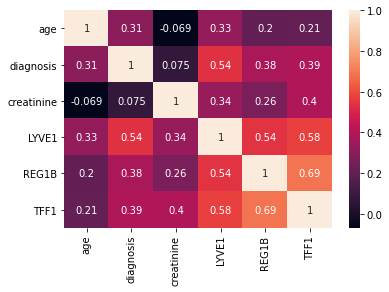

In [9]:
## Correlation Between Features
sns.heatmap(data.corr(),annot=True)

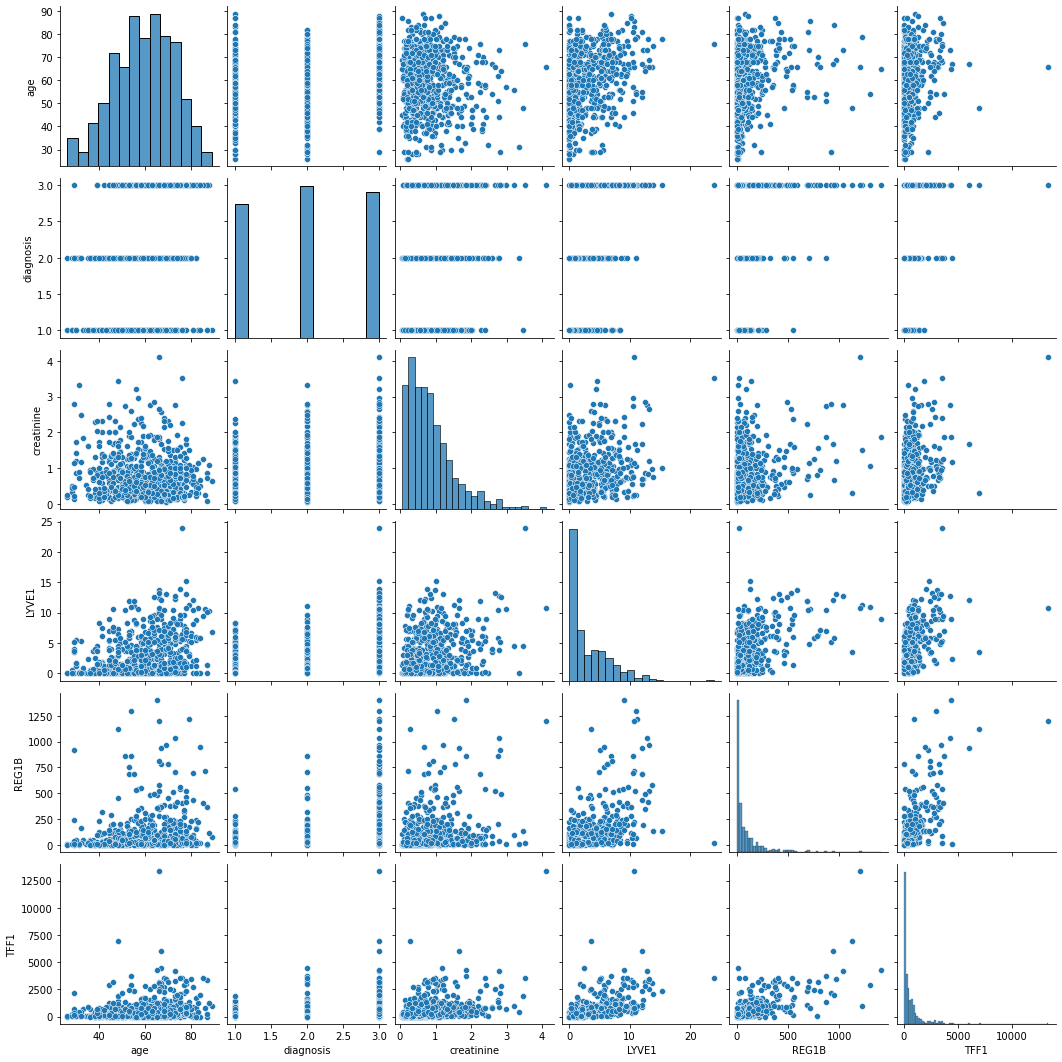

In [10]:
## Relation Between the Features
sns.pairplot(data)

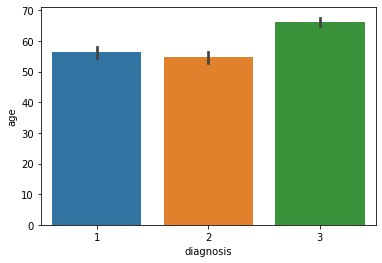

In [11]:
sns.barplot(data['diagnosis'],data['age'])

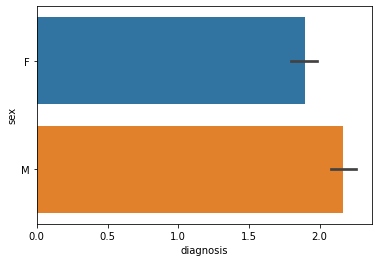

In [12]:
sns.barplot(data['diagnosis'],data['sex'])

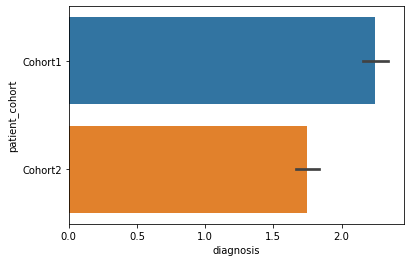

In [13]:
sns.barplot(data['diagnosis'],data['patient_cohort'])

In [14]:
display('Patient_Cohort',data['patient_cohort'].value_counts())
print('*'*100)
display('Sample_Origin',data['sample_origin'].value_counts())
print('*'*100)
display('sex',data['sex'].value_counts())

'Patient_Cohort'

Cohort1    332
Cohort2    258
Name: patient_cohort, dtype: int64

****************************************************************************************************


'Sample_Origin'

BPTB    409
LIV     132
ESP      29
UCL      20
Name: sample_origin, dtype: int64

****************************************************************************************************


'sex'

F    299
M    291
Name: sex, dtype: int64

In [15]:
categorical_col = ['patient_cohort','sample_origin','sex']
for col in categorical_col:
    dummy = pd.get_dummies(data[col],prefix=col)
    data = pd.concat([data,dummy],axis=1)
    del data[col]

In [16]:
## Feature Selection 

X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

In [17]:
X.head()

,age,creatinine,LYVE1,REG1B,TFF1,patient_cohort_Cohort1,patient_cohort_Cohort2,sample_origin_BPTB,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL,sex_F,sex_M
0,33,1.83222,0.893219,52.94884,654.282174,1,0,1,0,0,0,1,0
1,81,0.97266,2.037585,94.46703,209.488250,1,0,1,0,0,0,1,0
2,51,0.78039,0.145589,102.36600,461.141000,0,1,1,0,0,0,0,1
3,61,0.70122,0.002805,60.57900,142.950000,0,1,1,0,0,0,0,1
4,62,0.21489,0.000860,65.54000,41.088000,0,1,1,0,0,0,0,1


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
ordered_rank_features = SelectKBest(score_func=chi2,k=13)
ordered_features = ordered_rank_features.fit(X,y)

In [21]:
dfscores = pd.DataFrame(ordered_features.scores_,columns=['Scores'])
dfcolumns = pd.DataFrame(X.columns)

In [22]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)

In [23]:
features_rank.columns=['Features','Scores']
features_rank.nlargest(13,'Scores')

,Features,Scores
4,TFF1,165038.109659
3,REG1B,35696.552038
2,LYVE1,752.013105
0,age,260.691790
9,sample_origin_LIV,94.948021
7,sample_origin_BPTB,46.743395
6,patient_cohort_Cohort2,43.434171
10,sample_origin_UCL,36.730769
5,patient_cohort_Cohort1,33.753061
8,sample_origin_ESP,28.603702


In [24]:
## Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [25]:
print(model.feature_importances_)

[0.14738929 0.12759817 0.18759946 0.14845038 0.16136576 0.02252102
 0.03112261 0.07288409 0.01003872 0.04116656 0.02796869 0.01129838
 0.01059687]


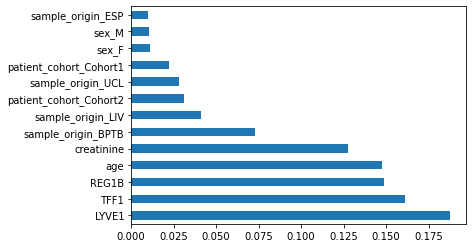

In [26]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(13).plot(kind='barh')
plt.show()


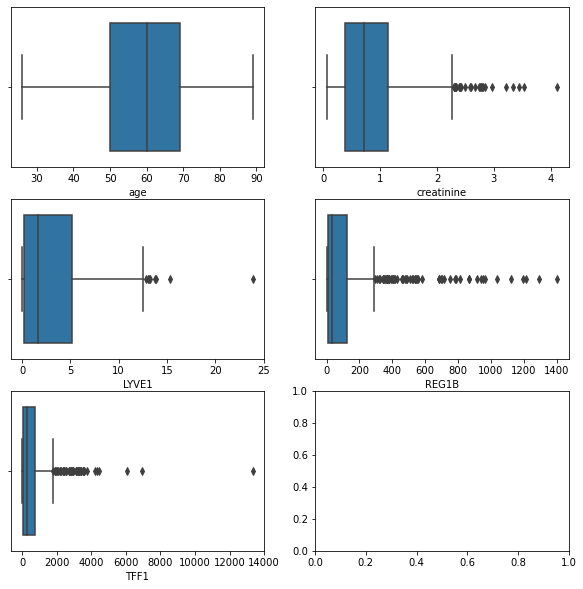

In [27]:
fig, axes = plt.subplots(figsize=(10,10), ncols=2, nrows=3)
sns.boxplot(data['age'],ax=axes[0,0])
sns.boxplot(data['creatinine'],ax=axes[0,1])
sns.boxplot(data['LYVE1'],ax=axes[1,0])
sns.boxplot(data['REG1B'],ax=axes[1,1])
sns.boxplot(data['TFF1'],ax=axes[2,0])

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['age', 'creatinine', 'LYVE1','REG1B','TFF1']] = scaler.fit_transform(data[['age', 'creatinine', 'LYVE1','REG1B','TFF1']])

In [29]:
data.head()

,age,diagnosis,creatinine,LYVE1,REG1B,TFF1,patient_cohort_Cohort1,patient_cohort_Cohort2,sample_origin_BPTB,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL,sex_F,sex_M
0,0.111111,1,0.437326,0.037383,0.037715,0.049030,1,0,1,0,0,0,1,0
1,0.873016,1,0.225627,0.085284,0.067288,0.015698,1,0,1,0,0,0,1,0
2,0.396825,1,0.178273,0.006089,0.072915,0.034557,0,1,1,0,0,0,0,1
3,0.555556,1,0.158774,0.000112,0.043150,0.010712,0,1,1,0,0,0,0,1
4,0.571429,1,0.038997,0.000031,0.046684,0.003079,0,1,1,0,0,0,0,1


In [30]:
data['diagnosis'].value_counts()

2    208
3    199
1    183
Name: diagnosis, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [33]:
log_regression = LogisticRegression()
decision_tree_classifier = DecisionTreeClassifier()
xgboost_classifier = XGBClassifier()
catboost_classifier = CatBoostClassifier()
lgbm_classifier = LGBMClassifier()

ml_models = [log_regression, decision_tree_classifier, xgboost_classifier, catboost_classifier, lgbm_classifier]

In [34]:
best_accuracies = 0.0;
model_dict = {0:'LogisticRegression',1:'Decision_Tree_Classifier',2:'Xgboost_Classifier',3:'CatBoost_Classifier',4:'LGBM_Classifier'}

In [35]:
for models in ml_models:
    models.fit(X_train, y_train)

0:	learn: 1.0875277	total: 153ms	remaining: 2m 32s
1:	learn: 1.0766301	total: 163ms	remaining: 1m 21s
2:	learn: 1.0662149	total: 170ms	remaining: 56.5s
3:	learn: 1.0538588	total: 175ms	remaining: 43.7s
4:	learn: 1.0448524	total: 181ms	remaining: 36s
5:	learn: 1.0333109	total: 186ms	remaining: 30.9s
6:	learn: 1.0228027	total: 191ms	remaining: 27.1s
7:	learn: 1.0124787	total: 197ms	remaining: 24.4s
8:	learn: 1.0029469	total: 202ms	remaining: 22.3s
9:	learn: 0.9948689	total: 208ms	remaining: 20.5s
10:	learn: 0.9862791	total: 213ms	remaining: 19.1s
11:	learn: 0.9780331	total: 218ms	remaining: 18s
12:	learn: 0.9701069	total: 224ms	remaining: 17s
13:	learn: 0.9623670	total: 229ms	remaining: 16.1s
14:	learn: 0.9513784	total: 235ms	remaining: 15.4s
15:	learn: 0.9432114	total: 240ms	remaining: 14.7s
16:	learn: 0.9360884	total: 245ms	remaining: 14.2s
17:	learn: 0.9276320	total: 250ms	remaining: 13.6s
18:	learn: 0.9215995	total: 255ms	remaining: 13.2s
19:	learn: 0.9151842	total: 260ms	remaining: 

162:	learn: 0.5383173	total: 658ms	remaining: 3.38s
163:	learn: 0.5374699	total: 661ms	remaining: 3.37s
164:	learn: 0.5361777	total: 664ms	remaining: 3.36s
165:	learn: 0.5355121	total: 666ms	remaining: 3.35s
166:	learn: 0.5338574	total: 669ms	remaining: 3.34s
167:	learn: 0.5328055	total: 672ms	remaining: 3.33s
168:	learn: 0.5315320	total: 676ms	remaining: 3.32s
169:	learn: 0.5300627	total: 679ms	remaining: 3.31s
170:	learn: 0.5292072	total: 682ms	remaining: 3.31s
171:	learn: 0.5284822	total: 686ms	remaining: 3.3s
172:	learn: 0.5272755	total: 689ms	remaining: 3.29s
173:	learn: 0.5261844	total: 692ms	remaining: 3.29s
174:	learn: 0.5252124	total: 695ms	remaining: 3.28s
175:	learn: 0.5241420	total: 699ms	remaining: 3.27s
176:	learn: 0.5227094	total: 702ms	remaining: 3.27s
177:	learn: 0.5216260	total: 705ms	remaining: 3.26s
178:	learn: 0.5210247	total: 708ms	remaining: 3.25s
179:	learn: 0.5200314	total: 711ms	remaining: 3.24s
180:	learn: 0.5191143	total: 714ms	remaining: 3.23s
181:	learn: 0

331:	learn: 0.3968527	total: 1.16s	remaining: 2.32s
332:	learn: 0.3961403	total: 1.16s	remaining: 2.32s
333:	learn: 0.3957798	total: 1.16s	remaining: 2.31s
334:	learn: 0.3954140	total: 1.16s	remaining: 2.31s
335:	learn: 0.3948351	total: 1.17s	remaining: 2.3s
336:	learn: 0.3944566	total: 1.17s	remaining: 2.3s
337:	learn: 0.3938067	total: 1.17s	remaining: 2.29s
338:	learn: 0.3933990	total: 1.18s	remaining: 2.29s
339:	learn: 0.3927616	total: 1.18s	remaining: 2.29s
340:	learn: 0.3923463	total: 1.18s	remaining: 2.28s
341:	learn: 0.3915677	total: 1.18s	remaining: 2.28s
342:	learn: 0.3909697	total: 1.19s	remaining: 2.27s
343:	learn: 0.3903600	total: 1.19s	remaining: 2.27s
344:	learn: 0.3897513	total: 1.19s	remaining: 2.27s
345:	learn: 0.3889392	total: 1.2s	remaining: 2.26s
346:	learn: 0.3882471	total: 1.2s	remaining: 2.25s
347:	learn: 0.3876106	total: 1.2s	remaining: 2.25s
348:	learn: 0.3869928	total: 1.2s	remaining: 2.25s
349:	learn: 0.3864335	total: 1.21s	remaining: 2.24s
350:	learn: 0.3857

515:	learn: 0.3066329	total: 1.66s	remaining: 1.56s
516:	learn: 0.3064553	total: 1.66s	remaining: 1.55s
517:	learn: 0.3059964	total: 1.67s	remaining: 1.55s
518:	learn: 0.3055772	total: 1.67s	remaining: 1.55s
519:	learn: 0.3052483	total: 1.67s	remaining: 1.54s
520:	learn: 0.3046570	total: 1.68s	remaining: 1.54s
521:	learn: 0.3044426	total: 1.68s	remaining: 1.54s
522:	learn: 0.3039015	total: 1.68s	remaining: 1.53s
523:	learn: 0.3033658	total: 1.68s	remaining: 1.53s
524:	learn: 0.3030257	total: 1.69s	remaining: 1.52s
525:	learn: 0.3027501	total: 1.69s	remaining: 1.52s
526:	learn: 0.3024332	total: 1.69s	remaining: 1.52s
527:	learn: 0.3021277	total: 1.7s	remaining: 1.52s
528:	learn: 0.3016490	total: 1.7s	remaining: 1.51s
529:	learn: 0.3012827	total: 1.7s	remaining: 1.51s
530:	learn: 0.3007986	total: 1.7s	remaining: 1.5s
531:	learn: 0.3004152	total: 1.71s	remaining: 1.5s
532:	learn: 0.3000759	total: 1.71s	remaining: 1.5s
533:	learn: 0.2998795	total: 1.71s	remaining: 1.5s
534:	learn: 0.299365

697:	learn: 0.2480913	total: 2.16s	remaining: 933ms
698:	learn: 0.2477140	total: 2.16s	remaining: 930ms
699:	learn: 0.2474208	total: 2.16s	remaining: 927ms
700:	learn: 0.2470083	total: 2.16s	remaining: 923ms
701:	learn: 0.2466952	total: 2.17s	remaining: 920ms
702:	learn: 0.2463925	total: 2.17s	remaining: 917ms
703:	learn: 0.2461341	total: 2.17s	remaining: 914ms
704:	learn: 0.2458347	total: 2.18s	remaining: 911ms
705:	learn: 0.2456440	total: 2.18s	remaining: 908ms
706:	learn: 0.2452988	total: 2.18s	remaining: 904ms
707:	learn: 0.2451429	total: 2.18s	remaining: 901ms
708:	learn: 0.2447807	total: 2.19s	remaining: 898ms
709:	learn: 0.2443608	total: 2.19s	remaining: 894ms
710:	learn: 0.2440605	total: 2.19s	remaining: 891ms
711:	learn: 0.2437418	total: 2.19s	remaining: 888ms
712:	learn: 0.2436448	total: 2.2s	remaining: 885ms
713:	learn: 0.2433685	total: 2.2s	remaining: 881ms
714:	learn: 0.2432288	total: 2.2s	remaining: 878ms
715:	learn: 0.2429692	total: 2.21s	remaining: 875ms
716:	learn: 0.2

887:	learn: 0.2024995	total: 2.65s	remaining: 335ms
888:	learn: 0.2022752	total: 2.66s	remaining: 332ms
889:	learn: 0.2020601	total: 2.66s	remaining: 329ms
890:	learn: 0.2018153	total: 2.66s	remaining: 326ms
891:	learn: 0.2016591	total: 2.67s	remaining: 323ms
892:	learn: 0.2014338	total: 2.67s	remaining: 320ms
893:	learn: 0.2013070	total: 2.67s	remaining: 317ms
894:	learn: 0.2011110	total: 2.67s	remaining: 314ms
895:	learn: 0.2008197	total: 2.68s	remaining: 311ms
896:	learn: 0.2005749	total: 2.68s	remaining: 308ms
897:	learn: 0.2003602	total: 2.68s	remaining: 305ms
898:	learn: 0.2002100	total: 2.69s	remaining: 302ms
899:	learn: 0.1999910	total: 2.69s	remaining: 299ms
900:	learn: 0.1997970	total: 2.69s	remaining: 296ms
901:	learn: 0.1995562	total: 2.69s	remaining: 293ms
902:	learn: 0.1994836	total: 2.69s	remaining: 290ms
903:	learn: 0.1992987	total: 2.7s	remaining: 287ms
904:	learn: 0.1990009	total: 2.7s	remaining: 284ms
905:	learn: 0.1988926	total: 2.7s	remaining: 280ms
906:	learn: 0.1

In [36]:
for i, models in enumerate(ml_models):
    print( model_dict[i], models.score(X_test, y_test)) 

LogisticRegression 0.652542372881356
Decision_Tree_Classifier 0.6101694915254238
Xgboost_Classifier 0.7372881355932204
CatBoost_Classifier 0.711864406779661
LGBM_Classifier 0.6864406779661016


In [37]:
## Model Accuracy Using Cross Validation
from sklearn.model_selection import cross_val_score
for i, models in enumerate(ml_models):
    print(model_dict[i], cross_val_score(models,X,y,cv=5).mean())


LogisticRegression 0.5847457627118644
Decision_Tree_Classifier 0.5389830508474576
Xgboost_Classifier 0.6254237288135593
0:	learn: 1.0870016	total: 3.98ms	remaining: 3.98s
1:	learn: 1.0755283	total: 7.37ms	remaining: 3.68s
2:	learn: 1.0634062	total: 10.8ms	remaining: 3.59s
3:	learn: 1.0503868	total: 14.1ms	remaining: 3.52s
4:	learn: 1.0397548	total: 17.4ms	remaining: 3.46s
5:	learn: 1.0311937	total: 20.7ms	remaining: 3.43s
6:	learn: 1.0209695	total: 23.8ms	remaining: 3.37s
7:	learn: 1.0108240	total: 27.1ms	remaining: 3.35s
8:	learn: 1.0006634	total: 30.3ms	remaining: 3.34s
9:	learn: 0.9916953	total: 33.5ms	remaining: 3.32s
10:	learn: 0.9826334	total: 36.7ms	remaining: 3.3s
11:	learn: 0.9711410	total: 39.3ms	remaining: 3.23s
12:	learn: 0.9624339	total: 41.8ms	remaining: 3.18s
13:	learn: 0.9539631	total: 44.3ms	remaining: 3.12s
14:	learn: 0.9455606	total: 46.8ms	remaining: 3.08s
15:	learn: 0.9384741	total: 49.5ms	remaining: 3.04s
16:	learn: 0.9323638	total: 52.9ms	remaining: 3.06s
17:	lea

162:	learn: 0.5325159	total: 439ms	remaining: 2.25s
163:	learn: 0.5309647	total: 442ms	remaining: 2.25s
164:	learn: 0.5296814	total: 445ms	remaining: 2.25s
165:	learn: 0.5290078	total: 448ms	remaining: 2.25s
166:	learn: 0.5277804	total: 451ms	remaining: 2.25s
167:	learn: 0.5269258	total: 454ms	remaining: 2.25s
168:	learn: 0.5260303	total: 457ms	remaining: 2.25s
169:	learn: 0.5249411	total: 460ms	remaining: 2.24s
170:	learn: 0.5243993	total: 463ms	remaining: 2.24s
171:	learn: 0.5232512	total: 468ms	remaining: 2.25s
172:	learn: 0.5215193	total: 472ms	remaining: 2.25s
173:	learn: 0.5205673	total: 475ms	remaining: 2.25s
174:	learn: 0.5194148	total: 478ms	remaining: 2.25s
175:	learn: 0.5185129	total: 481ms	remaining: 2.25s
176:	learn: 0.5172586	total: 484ms	remaining: 2.25s
177:	learn: 0.5161812	total: 487ms	remaining: 2.25s
178:	learn: 0.5151636	total: 490ms	remaining: 2.25s
179:	learn: 0.5143346	total: 493ms	remaining: 2.24s
180:	learn: 0.5131970	total: 496ms	remaining: 2.24s
181:	learn: 

347:	learn: 0.3850837	total: 935ms	remaining: 1.75s
348:	learn: 0.3847225	total: 938ms	remaining: 1.75s
349:	learn: 0.3841650	total: 941ms	remaining: 1.75s
350:	learn: 0.3834991	total: 944ms	remaining: 1.74s
351:	learn: 0.3828771	total: 947ms	remaining: 1.74s
352:	learn: 0.3824161	total: 949ms	remaining: 1.74s
353:	learn: 0.3818320	total: 952ms	remaining: 1.74s
354:	learn: 0.3812838	total: 956ms	remaining: 1.74s
355:	learn: 0.3806578	total: 958ms	remaining: 1.73s
356:	learn: 0.3799635	total: 961ms	remaining: 1.73s
357:	learn: 0.3791970	total: 964ms	remaining: 1.73s
358:	learn: 0.3786772	total: 967ms	remaining: 1.73s
359:	learn: 0.3782385	total: 969ms	remaining: 1.72s
360:	learn: 0.3776294	total: 972ms	remaining: 1.72s
361:	learn: 0.3767481	total: 974ms	remaining: 1.72s
362:	learn: 0.3761738	total: 976ms	remaining: 1.71s
363:	learn: 0.3755180	total: 979ms	remaining: 1.71s
364:	learn: 0.3751792	total: 982ms	remaining: 1.71s
365:	learn: 0.3748275	total: 984ms	remaining: 1.7s
366:	learn: 0

531:	learn: 0.3015192	total: 1.43s	remaining: 1.25s
532:	learn: 0.3013072	total: 1.43s	remaining: 1.25s
533:	learn: 0.3010067	total: 1.43s	remaining: 1.25s
534:	learn: 0.3006818	total: 1.44s	remaining: 1.25s
535:	learn: 0.3004817	total: 1.44s	remaining: 1.25s
536:	learn: 0.3003562	total: 1.44s	remaining: 1.24s
537:	learn: 0.3001110	total: 1.44s	remaining: 1.24s
538:	learn: 0.2998567	total: 1.45s	remaining: 1.24s
539:	learn: 0.2995529	total: 1.45s	remaining: 1.23s
540:	learn: 0.2992490	total: 1.45s	remaining: 1.23s
541:	learn: 0.2985816	total: 1.45s	remaining: 1.23s
542:	learn: 0.2980913	total: 1.46s	remaining: 1.23s
543:	learn: 0.2976675	total: 1.46s	remaining: 1.22s
544:	learn: 0.2973275	total: 1.46s	remaining: 1.22s
545:	learn: 0.2971202	total: 1.46s	remaining: 1.22s
546:	learn: 0.2969440	total: 1.47s	remaining: 1.21s
547:	learn: 0.2965310	total: 1.47s	remaining: 1.21s
548:	learn: 0.2961903	total: 1.47s	remaining: 1.21s
549:	learn: 0.2956938	total: 1.47s	remaining: 1.21s
550:	learn: 

726:	learn: 0.2422148	total: 1.92s	remaining: 722ms
727:	learn: 0.2419305	total: 1.93s	remaining: 720ms
728:	learn: 0.2417146	total: 1.93s	remaining: 718ms
729:	learn: 0.2415470	total: 1.93s	remaining: 715ms
730:	learn: 0.2412352	total: 1.94s	remaining: 713ms
731:	learn: 0.2407806	total: 1.94s	remaining: 710ms
732:	learn: 0.2405987	total: 1.94s	remaining: 707ms
733:	learn: 0.2403431	total: 1.95s	remaining: 705ms
734:	learn: 0.2400874	total: 1.95s	remaining: 703ms
735:	learn: 0.2399509	total: 1.95s	remaining: 700ms
736:	learn: 0.2395568	total: 1.96s	remaining: 698ms
737:	learn: 0.2393995	total: 1.96s	remaining: 695ms
738:	learn: 0.2391413	total: 1.96s	remaining: 693ms
739:	learn: 0.2389223	total: 1.96s	remaining: 690ms
740:	learn: 0.2385497	total: 1.97s	remaining: 687ms
741:	learn: 0.2382151	total: 1.97s	remaining: 685ms
742:	learn: 0.2378649	total: 1.97s	remaining: 682ms
743:	learn: 0.2376581	total: 1.98s	remaining: 680ms
744:	learn: 0.2372905	total: 1.98s	remaining: 677ms
745:	learn: 

910:	learn: 0.1987391	total: 2.41s	remaining: 236ms
911:	learn: 0.1986333	total: 2.42s	remaining: 233ms
912:	learn: 0.1982431	total: 2.42s	remaining: 231ms
913:	learn: 0.1980650	total: 2.42s	remaining: 228ms
914:	learn: 0.1978741	total: 2.42s	remaining: 225ms
915:	learn: 0.1977056	total: 2.43s	remaining: 223ms
916:	learn: 0.1975863	total: 2.43s	remaining: 220ms
917:	learn: 0.1974225	total: 2.43s	remaining: 217ms
918:	learn: 0.1971895	total: 2.43s	remaining: 215ms
919:	learn: 0.1970067	total: 2.44s	remaining: 212ms
920:	learn: 0.1968080	total: 2.44s	remaining: 209ms
921:	learn: 0.1966356	total: 2.44s	remaining: 207ms
922:	learn: 0.1964167	total: 2.44s	remaining: 204ms
923:	learn: 0.1961086	total: 2.45s	remaining: 201ms
924:	learn: 0.1959927	total: 2.45s	remaining: 199ms
925:	learn: 0.1958667	total: 2.45s	remaining: 196ms
926:	learn: 0.1955816	total: 2.46s	remaining: 194ms
927:	learn: 0.1954047	total: 2.46s	remaining: 191ms
928:	learn: 0.1952275	total: 2.46s	remaining: 188ms
929:	learn: 

87:	learn: 0.6625203	total: 346ms	remaining: 3.58s
88:	learn: 0.6603625	total: 349ms	remaining: 3.57s
89:	learn: 0.6575849	total: 352ms	remaining: 3.56s
90:	learn: 0.6554876	total: 355ms	remaining: 3.54s
91:	learn: 0.6528757	total: 357ms	remaining: 3.53s
92:	learn: 0.6505640	total: 360ms	remaining: 3.51s
93:	learn: 0.6485959	total: 363ms	remaining: 3.5s
94:	learn: 0.6468105	total: 366ms	remaining: 3.49s
95:	learn: 0.6451223	total: 369ms	remaining: 3.48s
96:	learn: 0.6434365	total: 372ms	remaining: 3.46s
97:	learn: 0.6420151	total: 374ms	remaining: 3.44s
98:	learn: 0.6400475	total: 377ms	remaining: 3.43s
99:	learn: 0.6380823	total: 379ms	remaining: 3.41s
100:	learn: 0.6363430	total: 382ms	remaining: 3.4s
101:	learn: 0.6344966	total: 385ms	remaining: 3.39s
102:	learn: 0.6322197	total: 387ms	remaining: 3.37s
103:	learn: 0.6304625	total: 390ms	remaining: 3.36s
104:	learn: 0.6290365	total: 392ms	remaining: 3.34s
105:	learn: 0.6273290	total: 395ms	remaining: 3.33s
106:	learn: 0.6248123	total

278:	learn: 0.4342790	total: 841ms	remaining: 2.17s
279:	learn: 0.4333854	total: 844ms	remaining: 2.17s
280:	learn: 0.4323471	total: 847ms	remaining: 2.17s
281:	learn: 0.4314169	total: 849ms	remaining: 2.16s
282:	learn: 0.4307438	total: 853ms	remaining: 2.16s
283:	learn: 0.4298097	total: 856ms	remaining: 2.16s
284:	learn: 0.4291480	total: 858ms	remaining: 2.15s
285:	learn: 0.4283128	total: 861ms	remaining: 2.15s
286:	learn: 0.4275246	total: 864ms	remaining: 2.15s
287:	learn: 0.4266916	total: 867ms	remaining: 2.14s
288:	learn: 0.4257232	total: 870ms	remaining: 2.14s
289:	learn: 0.4249419	total: 872ms	remaining: 2.13s
290:	learn: 0.4243360	total: 875ms	remaining: 2.13s
291:	learn: 0.4237282	total: 877ms	remaining: 2.13s
292:	learn: 0.4230031	total: 880ms	remaining: 2.12s
293:	learn: 0.4221486	total: 882ms	remaining: 2.12s
294:	learn: 0.4214026	total: 885ms	remaining: 2.12s
295:	learn: 0.4207404	total: 888ms	remaining: 2.11s
296:	learn: 0.4202116	total: 891ms	remaining: 2.11s
297:	learn: 

470:	learn: 0.3213528	total: 1.34s	remaining: 1.5s
471:	learn: 0.3208434	total: 1.34s	remaining: 1.5s
472:	learn: 0.3203058	total: 1.34s	remaining: 1.5s
473:	learn: 0.3199892	total: 1.35s	remaining: 1.49s
474:	learn: 0.3194071	total: 1.35s	remaining: 1.49s
475:	learn: 0.3188662	total: 1.35s	remaining: 1.49s
476:	learn: 0.3185035	total: 1.35s	remaining: 1.49s
477:	learn: 0.3180492	total: 1.36s	remaining: 1.48s
478:	learn: 0.3177473	total: 1.36s	remaining: 1.48s
479:	learn: 0.3172837	total: 1.36s	remaining: 1.48s
480:	learn: 0.3170259	total: 1.36s	remaining: 1.47s
481:	learn: 0.3165895	total: 1.37s	remaining: 1.47s
482:	learn: 0.3161621	total: 1.37s	remaining: 1.47s
483:	learn: 0.3156262	total: 1.37s	remaining: 1.46s
484:	learn: 0.3151159	total: 1.38s	remaining: 1.46s
485:	learn: 0.3148911	total: 1.38s	remaining: 1.46s
486:	learn: 0.3144022	total: 1.38s	remaining: 1.45s
487:	learn: 0.3139753	total: 1.38s	remaining: 1.45s
488:	learn: 0.3133685	total: 1.39s	remaining: 1.45s
489:	learn: 0.3

649:	learn: 0.2554264	total: 1.83s	remaining: 988ms
650:	learn: 0.2551954	total: 1.84s	remaining: 987ms
651:	learn: 0.2549991	total: 1.84s	remaining: 985ms
652:	learn: 0.2546208	total: 1.85s	remaining: 982ms
653:	learn: 0.2542748	total: 1.85s	remaining: 981ms
654:	learn: 0.2540662	total: 1.86s	remaining: 979ms
655:	learn: 0.2535530	total: 1.86s	remaining: 976ms
656:	learn: 0.2532640	total: 1.86s	remaining: 974ms
657:	learn: 0.2527350	total: 1.87s	remaining: 971ms
658:	learn: 0.2523919	total: 1.87s	remaining: 968ms
659:	learn: 0.2522201	total: 1.87s	remaining: 965ms
660:	learn: 0.2519557	total: 1.88s	remaining: 963ms
661:	learn: 0.2517378	total: 1.88s	remaining: 960ms
662:	learn: 0.2512862	total: 1.88s	remaining: 957ms
663:	learn: 0.2507926	total: 1.89s	remaining: 954ms
664:	learn: 0.2505737	total: 1.89s	remaining: 951ms
665:	learn: 0.2501574	total: 1.89s	remaining: 948ms
666:	learn: 0.2498528	total: 1.89s	remaining: 945ms
667:	learn: 0.2494807	total: 1.9s	remaining: 943ms
668:	learn: 0

838:	learn: 0.2069466	total: 2.33s	remaining: 448ms
839:	learn: 0.2067510	total: 2.33s	remaining: 445ms
840:	learn: 0.2064881	total: 2.34s	remaining: 442ms
841:	learn: 0.2062187	total: 2.34s	remaining: 439ms
842:	learn: 0.2059325	total: 2.34s	remaining: 437ms
843:	learn: 0.2057985	total: 2.35s	remaining: 434ms
844:	learn: 0.2055539	total: 2.35s	remaining: 431ms
845:	learn: 0.2053479	total: 2.35s	remaining: 428ms
846:	learn: 0.2050115	total: 2.35s	remaining: 425ms
847:	learn: 0.2048440	total: 2.36s	remaining: 423ms
848:	learn: 0.2047787	total: 2.36s	remaining: 420ms
849:	learn: 0.2046180	total: 2.36s	remaining: 417ms
850:	learn: 0.2044042	total: 2.37s	remaining: 414ms
851:	learn: 0.2042661	total: 2.37s	remaining: 411ms
852:	learn: 0.2041285	total: 2.37s	remaining: 409ms
853:	learn: 0.2038439	total: 2.37s	remaining: 406ms
854:	learn: 0.2035105	total: 2.38s	remaining: 403ms
855:	learn: 0.2032526	total: 2.38s	remaining: 400ms
856:	learn: 0.2031180	total: 2.38s	remaining: 397ms
857:	learn: 

0:	learn: 1.0851804	total: 6.3ms	remaining: 6.29s
1:	learn: 1.0711860	total: 11.9ms	remaining: 5.96s
2:	learn: 1.0565399	total: 17.1ms	remaining: 5.68s
3:	learn: 1.0446119	total: 22.2ms	remaining: 5.53s
4:	learn: 1.0347108	total: 27.5ms	remaining: 5.47s
5:	learn: 1.0217675	total: 32.6ms	remaining: 5.4s
6:	learn: 1.0094420	total: 37.9ms	remaining: 5.38s
7:	learn: 0.9995431	total: 43.2ms	remaining: 5.36s
8:	learn: 0.9901700	total: 48.5ms	remaining: 5.34s
9:	learn: 0.9815908	total: 54ms	remaining: 5.34s
10:	learn: 0.9733744	total: 59.2ms	remaining: 5.32s
11:	learn: 0.9660271	total: 62.6ms	remaining: 5.15s
12:	learn: 0.9551036	total: 67.7ms	remaining: 5.14s
13:	learn: 0.9447405	total: 73.1ms	remaining: 5.15s
14:	learn: 0.9346088	total: 78.4ms	remaining: 5.15s
15:	learn: 0.9244938	total: 83.9ms	remaining: 5.16s
16:	learn: 0.9173520	total: 91.3ms	remaining: 5.28s
17:	learn: 0.9097404	total: 96.6ms	remaining: 5.27s
18:	learn: 0.9030141	total: 102ms	remaining: 5.28s
19:	learn: 0.8943063	total:

207:	learn: 0.4649474	total: 661ms	remaining: 2.52s
208:	learn: 0.4638031	total: 664ms	remaining: 2.51s
209:	learn: 0.4626105	total: 667ms	remaining: 2.51s
210:	learn: 0.4619388	total: 670ms	remaining: 2.5s
211:	learn: 0.4613758	total: 673ms	remaining: 2.5s
212:	learn: 0.4605609	total: 676ms	remaining: 2.5s
213:	learn: 0.4598636	total: 680ms	remaining: 2.5s
214:	learn: 0.4591062	total: 683ms	remaining: 2.49s
215:	learn: 0.4582934	total: 686ms	remaining: 2.49s
216:	learn: 0.4568714	total: 689ms	remaining: 2.48s
217:	learn: 0.4557340	total: 691ms	remaining: 2.48s
218:	learn: 0.4551458	total: 694ms	remaining: 2.48s
219:	learn: 0.4544614	total: 697ms	remaining: 2.47s
220:	learn: 0.4536714	total: 699ms	remaining: 2.46s
221:	learn: 0.4526318	total: 702ms	remaining: 2.46s
222:	learn: 0.4514641	total: 705ms	remaining: 2.45s
223:	learn: 0.4505875	total: 707ms	remaining: 2.45s
224:	learn: 0.4498563	total: 711ms	remaining: 2.45s
225:	learn: 0.4489139	total: 714ms	remaining: 2.44s
226:	learn: 0.44

382:	learn: 0.3475599	total: 1.15s	remaining: 1.86s
383:	learn: 0.3469649	total: 1.16s	remaining: 1.86s
384:	learn: 0.3464270	total: 1.16s	remaining: 1.85s
385:	learn: 0.3458982	total: 1.16s	remaining: 1.85s
386:	learn: 0.3455702	total: 1.17s	remaining: 1.85s
387:	learn: 0.3453036	total: 1.17s	remaining: 1.84s
388:	learn: 0.3449725	total: 1.17s	remaining: 1.84s
389:	learn: 0.3445133	total: 1.18s	remaining: 1.84s
390:	learn: 0.3439839	total: 1.18s	remaining: 1.83s
391:	learn: 0.3432800	total: 1.18s	remaining: 1.83s
392:	learn: 0.3425520	total: 1.18s	remaining: 1.83s
393:	learn: 0.3419810	total: 1.19s	remaining: 1.82s
394:	learn: 0.3414532	total: 1.19s	remaining: 1.82s
395:	learn: 0.3412724	total: 1.19s	remaining: 1.82s
396:	learn: 0.3406293	total: 1.19s	remaining: 1.81s
397:	learn: 0.3400124	total: 1.2s	remaining: 1.81s
398:	learn: 0.3394004	total: 1.2s	remaining: 1.81s
399:	learn: 0.3390389	total: 1.2s	remaining: 1.8s
400:	learn: 0.3385633	total: 1.21s	remaining: 1.8s
401:	learn: 0.337

560:	learn: 0.2710070	total: 1.64s	remaining: 1.28s
561:	learn: 0.2706852	total: 1.64s	remaining: 1.28s
562:	learn: 0.2702717	total: 1.64s	remaining: 1.28s
563:	learn: 0.2699702	total: 1.65s	remaining: 1.27s
564:	learn: 0.2695645	total: 1.65s	remaining: 1.27s
565:	learn: 0.2691249	total: 1.65s	remaining: 1.27s
566:	learn: 0.2687767	total: 1.66s	remaining: 1.26s
567:	learn: 0.2684949	total: 1.66s	remaining: 1.26s
568:	learn: 0.2681332	total: 1.66s	remaining: 1.26s
569:	learn: 0.2678760	total: 1.67s	remaining: 1.26s
570:	learn: 0.2673198	total: 1.67s	remaining: 1.25s
571:	learn: 0.2668441	total: 1.67s	remaining: 1.25s
572:	learn: 0.2665724	total: 1.68s	remaining: 1.25s
573:	learn: 0.2661050	total: 1.68s	remaining: 1.25s
574:	learn: 0.2658039	total: 1.68s	remaining: 1.24s
575:	learn: 0.2653543	total: 1.69s	remaining: 1.24s
576:	learn: 0.2651460	total: 1.69s	remaining: 1.24s
577:	learn: 0.2648947	total: 1.69s	remaining: 1.24s
578:	learn: 0.2644922	total: 1.7s	remaining: 1.23s
579:	learn: 0

742:	learn: 0.2173349	total: 2.13s	remaining: 738ms
743:	learn: 0.2170264	total: 2.14s	remaining: 735ms
744:	learn: 0.2167676	total: 2.14s	remaining: 732ms
745:	learn: 0.2165917	total: 2.14s	remaining: 729ms
746:	learn: 0.2162808	total: 2.15s	remaining: 727ms
747:	learn: 0.2161026	total: 2.15s	remaining: 724ms
748:	learn: 0.2158226	total: 2.15s	remaining: 721ms
749:	learn: 0.2156342	total: 2.15s	remaining: 718ms
750:	learn: 0.2152675	total: 2.16s	remaining: 715ms
751:	learn: 0.2149569	total: 2.16s	remaining: 712ms
752:	learn: 0.2147443	total: 2.16s	remaining: 709ms
753:	learn: 0.2145543	total: 2.17s	remaining: 707ms
754:	learn: 0.2143186	total: 2.17s	remaining: 704ms
755:	learn: 0.2141201	total: 2.17s	remaining: 701ms
756:	learn: 0.2139480	total: 2.17s	remaining: 698ms
757:	learn: 0.2137139	total: 2.18s	remaining: 695ms
758:	learn: 0.2135731	total: 2.18s	remaining: 692ms
759:	learn: 0.2133271	total: 2.18s	remaining: 689ms
760:	learn: 0.2131055	total: 2.18s	remaining: 686ms
761:	learn: 

924:	learn: 0.1806815	total: 2.63s	remaining: 213ms
925:	learn: 0.1804893	total: 2.63s	remaining: 210ms
926:	learn: 0.1802504	total: 2.63s	remaining: 208ms
927:	learn: 0.1801412	total: 2.64s	remaining: 205ms
928:	learn: 0.1800522	total: 2.64s	remaining: 202ms
929:	learn: 0.1797895	total: 2.64s	remaining: 199ms
930:	learn: 0.1796834	total: 2.65s	remaining: 196ms
931:	learn: 0.1794936	total: 2.65s	remaining: 193ms
932:	learn: 0.1793546	total: 2.65s	remaining: 190ms
933:	learn: 0.1791040	total: 2.65s	remaining: 188ms
934:	learn: 0.1788946	total: 2.66s	remaining: 185ms
935:	learn: 0.1787374	total: 2.66s	remaining: 182ms
936:	learn: 0.1785817	total: 2.66s	remaining: 179ms
937:	learn: 0.1784106	total: 2.67s	remaining: 176ms
938:	learn: 0.1783137	total: 2.67s	remaining: 174ms
939:	learn: 0.1781811	total: 2.67s	remaining: 171ms
940:	learn: 0.1780798	total: 2.68s	remaining: 168ms
941:	learn: 0.1778400	total: 2.68s	remaining: 165ms
942:	learn: 0.1776630	total: 2.68s	remaining: 162ms
943:	learn: 

101:	learn: 0.6151533	total: 342ms	remaining: 3.01s
102:	learn: 0.6131970	total: 345ms	remaining: 3s
103:	learn: 0.6116592	total: 348ms	remaining: 3s
104:	learn: 0.6099944	total: 352ms	remaining: 3s
105:	learn: 0.6078865	total: 356ms	remaining: 3s
106:	learn: 0.6062476	total: 360ms	remaining: 3s
107:	learn: 0.6040102	total: 364ms	remaining: 3.01s
108:	learn: 0.6020571	total: 367ms	remaining: 3s
109:	learn: 0.6002321	total: 370ms	remaining: 3s
110:	learn: 0.5989713	total: 373ms	remaining: 2.99s
111:	learn: 0.5972088	total: 377ms	remaining: 2.99s
112:	learn: 0.5954705	total: 383ms	remaining: 3.01s
113:	learn: 0.5939639	total: 386ms	remaining: 3s
114:	learn: 0.5924975	total: 389ms	remaining: 2.99s
115:	learn: 0.5913450	total: 392ms	remaining: 2.98s
116:	learn: 0.5904792	total: 395ms	remaining: 2.98s
117:	learn: 0.5889627	total: 398ms	remaining: 2.97s
118:	learn: 0.5872274	total: 401ms	remaining: 2.96s
119:	learn: 0.5860738	total: 404ms	remaining: 2.96s
120:	learn: 0.5849198	total: 406ms	r

284:	learn: 0.4196327	total: 836ms	remaining: 2.1s
285:	learn: 0.4188381	total: 839ms	remaining: 2.09s
286:	learn: 0.4182753	total: 842ms	remaining: 2.09s
287:	learn: 0.4175231	total: 845ms	remaining: 2.09s
288:	learn: 0.4166057	total: 848ms	remaining: 2.09s
289:	learn: 0.4159690	total: 851ms	remaining: 2.08s
290:	learn: 0.4151993	total: 854ms	remaining: 2.08s
291:	learn: 0.4143143	total: 858ms	remaining: 2.08s
292:	learn: 0.4131842	total: 861ms	remaining: 2.08s
293:	learn: 0.4123445	total: 864ms	remaining: 2.07s
294:	learn: 0.4118167	total: 866ms	remaining: 2.07s
295:	learn: 0.4111693	total: 869ms	remaining: 2.07s
296:	learn: 0.4105180	total: 871ms	remaining: 2.06s
297:	learn: 0.4096808	total: 874ms	remaining: 2.06s
298:	learn: 0.4091086	total: 877ms	remaining: 2.06s
299:	learn: 0.4086366	total: 879ms	remaining: 2.05s
300:	learn: 0.4080832	total: 882ms	remaining: 2.05s
301:	learn: 0.4074432	total: 885ms	remaining: 2.04s
302:	learn: 0.4068236	total: 887ms	remaining: 2.04s
303:	learn: 0

463:	learn: 0.3242585	total: 1.33s	remaining: 1.53s
464:	learn: 0.3237374	total: 1.33s	remaining: 1.53s
465:	learn: 0.3234458	total: 1.33s	remaining: 1.53s
466:	learn: 0.3230662	total: 1.34s	remaining: 1.53s
467:	learn: 0.3226730	total: 1.34s	remaining: 1.52s
468:	learn: 0.3222506	total: 1.34s	remaining: 1.52s
469:	learn: 0.3217465	total: 1.35s	remaining: 1.52s
470:	learn: 0.3212397	total: 1.35s	remaining: 1.51s
471:	learn: 0.3207299	total: 1.35s	remaining: 1.51s
472:	learn: 0.3203471	total: 1.35s	remaining: 1.51s
473:	learn: 0.3198226	total: 1.36s	remaining: 1.5s
474:	learn: 0.3192756	total: 1.36s	remaining: 1.5s
475:	learn: 0.3188967	total: 1.36s	remaining: 1.5s
476:	learn: 0.3184007	total: 1.36s	remaining: 1.5s
477:	learn: 0.3179178	total: 1.37s	remaining: 1.49s
478:	learn: 0.3174043	total: 1.37s	remaining: 1.49s
479:	learn: 0.3169377	total: 1.37s	remaining: 1.49s
480:	learn: 0.3165413	total: 1.38s	remaining: 1.48s
481:	learn: 0.3159261	total: 1.38s	remaining: 1.48s
482:	learn: 0.31

646:	learn: 0.2590488	total: 1.83s	remaining: 997ms
647:	learn: 0.2587038	total: 1.83s	remaining: 995ms
648:	learn: 0.2583846	total: 1.83s	remaining: 992ms
649:	learn: 0.2580739	total: 1.84s	remaining: 989ms
650:	learn: 0.2577065	total: 1.84s	remaining: 986ms
651:	learn: 0.2572657	total: 1.84s	remaining: 984ms
652:	learn: 0.2569086	total: 1.85s	remaining: 982ms
653:	learn: 0.2567814	total: 1.85s	remaining: 979ms
654:	learn: 0.2565396	total: 1.85s	remaining: 977ms
655:	learn: 0.2561087	total: 1.86s	remaining: 974ms
656:	learn: 0.2558358	total: 1.86s	remaining: 971ms
657:	learn: 0.2555624	total: 1.86s	remaining: 969ms
658:	learn: 0.2553348	total: 1.86s	remaining: 965ms
659:	learn: 0.2550222	total: 1.87s	remaining: 962ms
660:	learn: 0.2548186	total: 1.87s	remaining: 960ms
661:	learn: 0.2543173	total: 1.87s	remaining: 957ms
662:	learn: 0.2539898	total: 1.88s	remaining: 954ms
663:	learn: 0.2536501	total: 1.88s	remaining: 951ms
664:	learn: 0.2534569	total: 1.88s	remaining: 948ms
665:	learn: 

831:	learn: 0.2102536	total: 2.32s	remaining: 468ms
832:	learn: 0.2099885	total: 2.32s	remaining: 465ms
833:	learn: 0.2097055	total: 2.32s	remaining: 462ms
834:	learn: 0.2094711	total: 2.33s	remaining: 460ms
835:	learn: 0.2091865	total: 2.33s	remaining: 457ms
836:	learn: 0.2090693	total: 2.33s	remaining: 454ms
837:	learn: 0.2088270	total: 2.33s	remaining: 451ms
838:	learn: 0.2085189	total: 2.34s	remaining: 449ms
839:	learn: 0.2083112	total: 2.34s	remaining: 446ms
840:	learn: 0.2080168	total: 2.34s	remaining: 443ms
841:	learn: 0.2076896	total: 2.35s	remaining: 440ms
842:	learn: 0.2074522	total: 2.35s	remaining: 437ms
843:	learn: 0.2073022	total: 2.35s	remaining: 434ms
844:	learn: 0.2071986	total: 2.35s	remaining: 432ms
845:	learn: 0.2070196	total: 2.35s	remaining: 429ms
846:	learn: 0.2067385	total: 2.36s	remaining: 426ms
847:	learn: 0.2066029	total: 2.36s	remaining: 423ms
848:	learn: 0.2063291	total: 2.36s	remaining: 420ms
849:	learn: 0.2061378	total: 2.37s	remaining: 417ms
850:	learn: 

0:	learn: 1.0842184	total: 8.48ms	remaining: 8.47s
1:	learn: 1.0715297	total: 13.8ms	remaining: 6.88s
2:	learn: 1.0580843	total: 18.9ms	remaining: 6.28s
3:	learn: 1.0449850	total: 24.7ms	remaining: 6.16s
4:	learn: 1.0348767	total: 30.3ms	remaining: 6.03s
5:	learn: 1.0246668	total: 36.2ms	remaining: 5.99s
6:	learn: 1.0134475	total: 42.1ms	remaining: 5.97s
7:	learn: 1.0031935	total: 48ms	remaining: 5.95s
8:	learn: 0.9924814	total: 53.9ms	remaining: 5.93s
9:	learn: 0.9827405	total: 59.8ms	remaining: 5.92s
10:	learn: 0.9732967	total: 65.1ms	remaining: 5.85s
11:	learn: 0.9613992	total: 70.4ms	remaining: 5.8s
12:	learn: 0.9529853	total: 76.1ms	remaining: 5.78s
13:	learn: 0.9444950	total: 81.4ms	remaining: 5.73s
14:	learn: 0.9369445	total: 87.2ms	remaining: 5.73s
15:	learn: 0.9296123	total: 92.3ms	remaining: 5.68s
16:	learn: 0.9227873	total: 97.7ms	remaining: 5.65s
17:	learn: 0.9147751	total: 103ms	remaining: 5.63s
18:	learn: 0.9060346	total: 109ms	remaining: 5.62s
19:	learn: 0.8993374	total:

164:	learn: 0.5154406	total: 506ms	remaining: 2.56s
165:	learn: 0.5148578	total: 508ms	remaining: 2.55s
166:	learn: 0.5135205	total: 511ms	remaining: 2.55s
167:	learn: 0.5122473	total: 514ms	remaining: 2.54s
168:	learn: 0.5107764	total: 516ms	remaining: 2.54s
169:	learn: 0.5095656	total: 519ms	remaining: 2.54s
170:	learn: 0.5084985	total: 522ms	remaining: 2.53s
171:	learn: 0.5078133	total: 525ms	remaining: 2.53s
172:	learn: 0.5061929	total: 528ms	remaining: 2.52s
173:	learn: 0.5051626	total: 530ms	remaining: 2.52s
174:	learn: 0.5038936	total: 534ms	remaining: 2.52s
175:	learn: 0.5030368	total: 536ms	remaining: 2.51s
176:	learn: 0.5016254	total: 540ms	remaining: 2.51s
177:	learn: 0.5003757	total: 542ms	remaining: 2.5s
178:	learn: 0.4996004	total: 545ms	remaining: 2.5s
179:	learn: 0.4990000	total: 547ms	remaining: 2.49s
180:	learn: 0.4981047	total: 550ms	remaining: 2.49s
181:	learn: 0.4966397	total: 552ms	remaining: 2.48s
182:	learn: 0.4955013	total: 555ms	remaining: 2.48s
183:	learn: 0.

349:	learn: 0.3760032	total: 1s	remaining: 1.86s
350:	learn: 0.3754495	total: 1s	remaining: 1.86s
351:	learn: 0.3749302	total: 1.01s	remaining: 1.85s
352:	learn: 0.3743924	total: 1.01s	remaining: 1.85s
353:	learn: 0.3734784	total: 1.01s	remaining: 1.85s
354:	learn: 0.3730980	total: 1.01s	remaining: 1.84s
355:	learn: 0.3727264	total: 1.02s	remaining: 1.84s
356:	learn: 0.3724126	total: 1.02s	remaining: 1.84s
357:	learn: 0.3717848	total: 1.02s	remaining: 1.84s
358:	learn: 0.3710620	total: 1.03s	remaining: 1.84s
359:	learn: 0.3704709	total: 1.03s	remaining: 1.84s
360:	learn: 0.3699048	total: 1.03s	remaining: 1.83s
361:	learn: 0.3693841	total: 1.04s	remaining: 1.83s
362:	learn: 0.3688201	total: 1.04s	remaining: 1.83s
363:	learn: 0.3680887	total: 1.04s	remaining: 1.83s
364:	learn: 0.3674524	total: 1.05s	remaining: 1.82s
365:	learn: 0.3668028	total: 1.05s	remaining: 1.82s
366:	learn: 0.3662587	total: 1.05s	remaining: 1.82s
367:	learn: 0.3657391	total: 1.05s	remaining: 1.81s
368:	learn: 0.3652

538:	learn: 0.2885852	total: 1.5s	remaining: 1.28s
539:	learn: 0.2881328	total: 1.5s	remaining: 1.28s
540:	learn: 0.2876581	total: 1.5s	remaining: 1.27s
541:	learn: 0.2870549	total: 1.51s	remaining: 1.27s
542:	learn: 0.2866874	total: 1.51s	remaining: 1.27s
543:	learn: 0.2863405	total: 1.51s	remaining: 1.27s
544:	learn: 0.2858935	total: 1.51s	remaining: 1.26s
545:	learn: 0.2856898	total: 1.52s	remaining: 1.26s
546:	learn: 0.2850935	total: 1.52s	remaining: 1.26s
547:	learn: 0.2846340	total: 1.52s	remaining: 1.26s
548:	learn: 0.2841274	total: 1.52s	remaining: 1.25s
549:	learn: 0.2839486	total: 1.53s	remaining: 1.25s
550:	learn: 0.2835787	total: 1.53s	remaining: 1.25s
551:	learn: 0.2832101	total: 1.53s	remaining: 1.24s
552:	learn: 0.2827414	total: 1.54s	remaining: 1.24s
553:	learn: 0.2824042	total: 1.54s	remaining: 1.24s
554:	learn: 0.2819480	total: 1.54s	remaining: 1.24s
555:	learn: 0.2814757	total: 1.54s	remaining: 1.23s
556:	learn: 0.2809622	total: 1.55s	remaining: 1.23s
557:	learn: 0.2

724:	learn: 0.2295493	total: 1.99s	remaining: 756ms
725:	learn: 0.2291913	total: 2s	remaining: 753ms
726:	learn: 0.2290755	total: 2s	remaining: 750ms
727:	learn: 0.2287857	total: 2s	remaining: 748ms
728:	learn: 0.2285193	total: 2s	remaining: 745ms
729:	learn: 0.2282401	total: 2.01s	remaining: 742ms
730:	learn: 0.2280812	total: 2.01s	remaining: 739ms
731:	learn: 0.2278362	total: 2.01s	remaining: 737ms
732:	learn: 0.2275916	total: 2.02s	remaining: 734ms
733:	learn: 0.2274671	total: 2.02s	remaining: 731ms
734:	learn: 0.2271866	total: 2.02s	remaining: 729ms
735:	learn: 0.2270097	total: 2.02s	remaining: 726ms
736:	learn: 0.2267286	total: 2.02s	remaining: 723ms
737:	learn: 0.2265698	total: 2.03s	remaining: 720ms
738:	learn: 0.2261954	total: 2.03s	remaining: 717ms
739:	learn: 0.2259563	total: 2.03s	remaining: 714ms
740:	learn: 0.2256866	total: 2.04s	remaining: 712ms
741:	learn: 0.2253947	total: 2.04s	remaining: 709ms
742:	learn: 0.2250691	total: 2.04s	remaining: 706ms
743:	learn: 0.2248790	to

910:	learn: 0.1882642	total: 2.49s	remaining: 243ms
911:	learn: 0.1881022	total: 2.49s	remaining: 240ms
912:	learn: 0.1879116	total: 2.49s	remaining: 237ms
913:	learn: 0.1877801	total: 2.5s	remaining: 235ms
914:	learn: 0.1875926	total: 2.5s	remaining: 232ms
915:	learn: 0.1874422	total: 2.5s	remaining: 230ms
916:	learn: 0.1872222	total: 2.51s	remaining: 227ms
917:	learn: 0.1871178	total: 2.51s	remaining: 224ms
918:	learn: 0.1869653	total: 2.51s	remaining: 221ms
919:	learn: 0.1868564	total: 2.52s	remaining: 219ms
920:	learn: 0.1865671	total: 2.52s	remaining: 216ms
921:	learn: 0.1862719	total: 2.52s	remaining: 213ms
922:	learn: 0.1861346	total: 2.52s	remaining: 211ms
923:	learn: 0.1860307	total: 2.53s	remaining: 208ms
924:	learn: 0.1858700	total: 2.53s	remaining: 205ms
925:	learn: 0.1857654	total: 2.54s	remaining: 203ms
926:	learn: 0.1856429	total: 2.54s	remaining: 200ms
927:	learn: 0.1855656	total: 2.54s	remaining: 197ms
928:	learn: 0.1854569	total: 2.55s	remaining: 195ms
929:	learn: 0.1

In [38]:
## Hyperparameter Tuning Randomized SearchCV on Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

c_space = np.logspace(-5, 40, 20)
param_grid = {'C': c_space}
  

logreg = LogisticRegression()
  

logreg_cv_model = RandomizedSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-05, 2.33572147e-03, 5.45559478e-01, 1.27427499e+02,
       2.97635144e+04, 6.95192796e+06, 1.62377674e+09, 3.79269019e+11,
       8.85866790e+13, 2.06913808e+16, 4.83293024e+18, 1.12883789e+21,
       2.63665090e+23, 6.15848211e+25, 1.43844989e+28, 3.35981829e+30,
       7.84759970e+32, 1.83298071e+35, 4.28133240e+37, 1.00000000e+40])})

In [39]:
logreg_cv_model.score(X_test,y_test)

0.6610169491525424

In [41]:
## Hyperparameter Tuning Randomized SearchCV on DecisionTree Classifier

from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3,4,5,6,7,8,9,10,11,12],
              "max_features": [int(x) for x in np.linspace(1, 20,10)],
              "min_samples_leaf": [int(x) for x in np.linspace(1, 20,10)],
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv_model = RandomizedSearchCV(tree, param_dist, n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=-1)
  
tree_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12],
                                        'max_features': [1, 3, 5, 7, 9, 11, 13,
                                                         15, 17, 20],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20]},
                   random_state=42, verbose=2)

In [42]:
tree_cv_model.score(X_test,y_test)

0.6440677966101694

In [43]:
## Hyperparameter Tuning Randomized SearchCV on XGBoost Classifier

from sklearn.model_selection import RandomizedSearchCV

learning_rate=[0.1,0.15]
n_estimators=[450,494]
max_depth=[3,5,7,9,10,12]
subsample = [0.40,0.50,0.60,0.70]
verbosity = [0]
scale_pos_weight = [0.5,1.5,2.5]
updater ="grow_histmaker",
base_score  = [0.1,0.2,0.3]

random_grid = {'learning_rate':learning_rate, 'n_estimators':n_estimators,'max_depth':max_depth,'subsample':subsample,'verbosity':verbosity,'scale_pos_weight':scale_pos_weight,'updater':updater,'base_score':base_score}
print(random_grid)

{'learning_rate': [0.1, 0.15], 'n_estimators': [450, 494], 'max_depth': [3, 5, 7, 9, 10, 12], 'subsample': [0.4, 0.5, 0.6, 0.7], 'verbosity': [0], 'scale_pos_weight': [0.5, 1.5, 2.5], 'updater': ('grow_histmaker',), 'base_score': [0.1, 0.2, 0.3]}


In [44]:
xgb_clf = XGBClassifier()
xgb_clf_randomcv = RandomizedSearchCV(estimator=xgb_clf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,random_state=100,n_jobs=-1)

In [45]:
xgb_clf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [46]:
xgb_model_randomcv=xgb_clf_randomcv.best_estimator_

In [47]:
xgb_model_randomcv.score(X_test,y_test)

0.711864406779661

In [48]:
## Hyperparameter Tuning Using Randomized SeachCV on  CatBoost Classifier

learning_rate=[0.10,0.12,0.15,0.18,0.19]
n_estimators=[int(x) for x in np.linspace(300,500,10)]
max_depth=[2,4,5,7,8]


random_grid = {'learning_rate':learning_rate, 'n_estimators':n_estimators,'max_depth':max_depth}
print(random_grid)

{'learning_rate': [0.1, 0.12, 0.15, 0.18, 0.19], 'n_estimators': [300, 322, 344, 366, 388, 411, 433, 455, 477, 500], 'max_depth': [2, 4, 5, 7, 8]}


In [49]:

cat_clf_model = CatBoostClassifier()
cat_clf_randomcv = RandomizedSearchCV(estimator=cat_clf_model,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)


In [50]:
cat_clf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0:	learn: 1.0623713	total: 13.1ms	remaining: 4.49s
1:	learn: 1.0311586	total: 23.6ms	remaining: 4.03s
2:	learn: 1.0004950	total: 38.2ms	remaining: 4.34s
3:	learn: 0.9687203	total: 52ms	remaining: 4.42s
4:	learn: 0.9400019	total: 63.6ms	remaining: 4.31s
5:	learn: 0.9134896	total: 76.4ms	remaining: 4.3s
6:	learn: 0.8888583	total: 85.7ms	remaining: 4.13s
7:	learn: 0.8671334	total: 100ms	remaining: 4.2s
8:	learn: 0.8446154	total: 114ms	remaining: 4.24s
9:	learn: 0.8269925	total: 120ms	remaining: 4.02s
10:	learn: 0.8116036	total: 127ms	remaining: 3.84s
11:	learn: 0.7980960	total: 133ms	remaining: 3.67s
12:	learn: 0.7856769	total: 142ms	remaining: 3.62s
13:	learn: 0.7695518	total: 148ms	remaining: 3.49s
14:	learn: 0.7566245	total: 160ms	remaining: 3.51s
15:	learn: 0.7447272	total: 169ms	remaining: 3.46s
16:	learn: 0.7336575	total: 177ms	remaining: 3.4s
17:	learn: 0.7184064	total: 185ms	remaining: 3.35s
18:	learn: 0.7084996	total:

174:	learn: 0.2393304	total: 1.23s	remaining: 1.19s
175:	learn: 0.2387803	total: 1.24s	remaining: 1.18s
176:	learn: 0.2376986	total: 1.24s	remaining: 1.17s
177:	learn: 0.2366046	total: 1.25s	remaining: 1.16s
178:	learn: 0.2355272	total: 1.25s	remaining: 1.16s
179:	learn: 0.2341601	total: 1.26s	remaining: 1.15s
180:	learn: 0.2332232	total: 1.27s	remaining: 1.14s
181:	learn: 0.2323458	total: 1.27s	remaining: 1.13s
182:	learn: 0.2309067	total: 1.28s	remaining: 1.13s
183:	learn: 0.2295367	total: 1.29s	remaining: 1.12s
184:	learn: 0.2285369	total: 1.29s	remaining: 1.11s
185:	learn: 0.2273644	total: 1.3s	remaining: 1.1s
186:	learn: 0.2261146	total: 1.31s	remaining: 1.1s
187:	learn: 0.2250352	total: 1.31s	remaining: 1.09s
188:	learn: 0.2244635	total: 1.32s	remaining: 1.08s
189:	learn: 0.2234831	total: 1.32s	remaining: 1.07s
190:	learn: 0.2227598	total: 1.33s	remaining: 1.07s
191:	learn: 0.2213311	total: 1.34s	remaining: 1.06s
192:	learn: 0.2203648	total: 1.34s	remaining: 1.05s
193:	learn: 0.2

337:	learn: 0.1309030	total: 2.27s	remaining: 40.3ms
338:	learn: 0.1305402	total: 2.27s	remaining: 33.5ms
339:	learn: 0.1298546	total: 2.28s	remaining: 26.8ms
340:	learn: 0.1295129	total: 2.28s	remaining: 20.1ms
341:	learn: 0.1292281	total: 2.29s	remaining: 13.4ms
342:	learn: 0.1288609	total: 2.3s	remaining: 6.7ms
343:	learn: 0.1287128	total: 2.3s	remaining: 0us


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001CB5C580240>,
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.12, 0.15, 0.18,
                                                          0.19],
                                        'max_depth': [2, 4, 5, 7, 8],
                                        'n_estimators': [300, 322, 344, 366,
                                                         388, 411, 433, 455,
                                                         477, 500]},
                   random_state=100, verbose=2)

In [51]:
cat_model_randomcv=cat_clf_randomcv.best_estimator_

In [52]:
cat_model_randomcv.score(X_test,y_test)

0.7033898305084746

In [53]:
## Hyperparameter Tuning Using Randomized SearchCV on LGBMClassifier

params_dist = {'subsample_freq' : [2,3,4,5,6,7,8],
               'objective' : "multiclass ",
               'importance_type' : "gain",
                'verbosity' : [-1],
                'max_bin' : [20,40,60,80],
               'num_leaves' : [250,270,290,300,320],
               'boosting_type' : 'dart',
                'learning_rate': [0.1,0.15],
                'n_estimators': [494],
                'max_depth' : [2,5,7,10,12,14],
                'scale_pos_weight':[2.5]}

lgmb_clf = LGBMClassifier()
  
# Instantiating RandomizedSearchCV object
lgbm_model_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
lgbm_model_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12],
                                        'max_features': [1, 3, 5, 7, 9, 11, 13,
                                                         15, 17, 20],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20]})

In [54]:
lgbm_model_cv.score(X_test,y_test)

0.6694915254237288

In [64]:
from sklearn.externals import joblib 
joblib.dump(xgb_model_randomcv, 'model.joblib')

['model.joblib']